In [1]:

key = '79a6a1db946c48b58b3174564c454791'

In [4]:
import shutil

from fastai.vision.widgets import *
from fastbook import *

In [5]:
men_types = 'beautiful','normal','ugly'

In [12]:
path = Path('men')

In [16]:
shutil.rmtree('men')

In [17]:
if not path.exists():
    path.mkdir()
    for o in men_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key,f'{o} men')
        download_images(dest,urls=results.attrgot('content_url'))
        #delete bad images
        print(o)
        fns = get_image_files(Path(path/o))
        failed = verify_images(fns)
        print(failed)
        failed.map(Path.unlink)

beautiful


(#0) []


normal


(#3) [Path('men/normal/00000004.jpg'),Path('men/normal/00000099.jpg'),Path('men/normal/00000112.jpg')]


ugly


(#3) [Path('men/ugly/00000047.jpg'),Path('men/ugly/00000056.jpg'),Path('men/ugly/00000098.jpg')]


In [74]:
men = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [75]:
men = men.new(item_tfms = RandomResizedCrop(224,min_scale=0.5), batch_tfms = aug_transforms())

In [76]:
dls= men.dataloaders(path)

In [77]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)

In [78]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.873346,1.671933,0.540230,00:04


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.120367,1.071949,0.413793,00:04
1,0.965611,0.699684,0.241379,00:04
2,0.829219,0.613451,0.229885,00:04
3,0.717190,0.585299,0.195402,00:05
4,0.653858,0.600383,0.206897,00:04


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


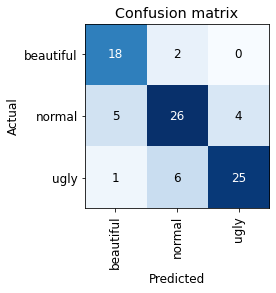

In [79]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

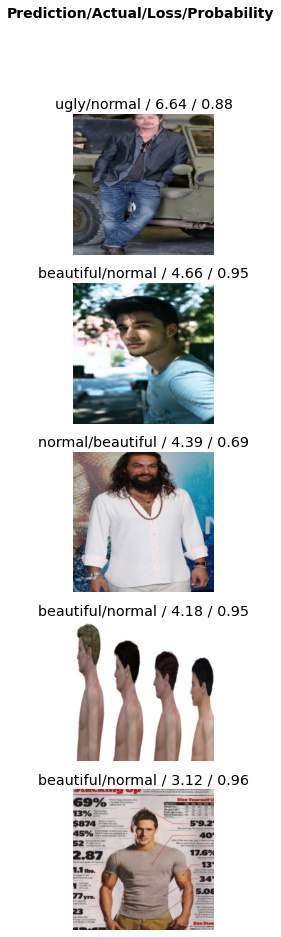

In [80]:
interp.plot_top_losses(5, nrows=5)


In [81]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [73]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: [Errno 2] No such file or directory: 'men/normal/00000055.jpg'

In [83]:
learn.export()

In [86]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [87]:
learn_inf = load_learner(path/'export.pkl')

In [92]:
learn_inf.predict('men/yaniv.jpg')

('ugly', tensor(2), tensor([0.0255, 0.3490, 0.6255]))

In [292]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [297]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

32432


In [298]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl = widgets.Output()
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    out_pl
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    print(32432)

btn_run.on_click(on_click_classify)

In [278]:
btn_upload = widgets.FileUpload()

In [295]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])